In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv('train.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# drop uneccesary columns
df.drop('customerID',axis='columns',inplace=True)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.shape

(7043, 20)

In [13]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
# change object column to numeric column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Visualise the Data


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'number of customers')

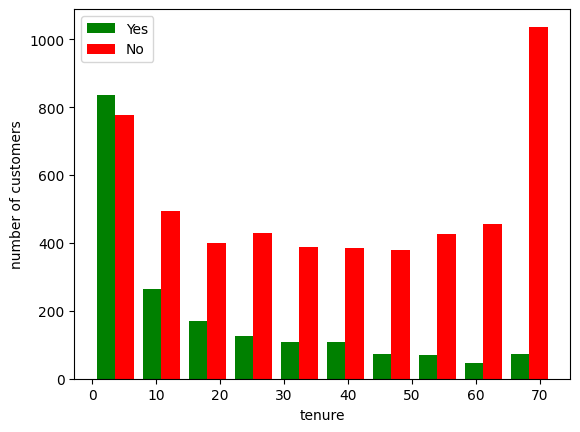

In [26]:
tenure_churn_no = df[df['Churn']=='No'].tenure
tenure_churn_yes = df[df['Churn']=='Yes'].tenure

plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Yes','No'])
plt.legend()

plt.xlabel('tenure')
plt.ylabel('number of customers')

Text(0, 0.5, 'Number of Customers')

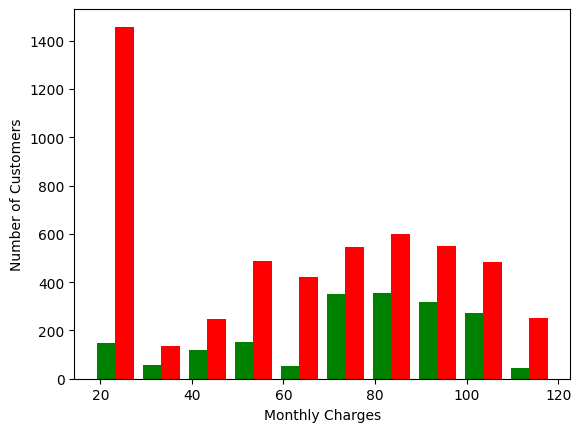

In [29]:
mc_churn_no = df[df['Churn']=='No'].MonthlyCharges
mc_churn_yes = df[df['Churn']=='Yes'].MonthlyCharges

plt.hist([mc_churn_yes,mc_churn_no],color=['green','red'])

plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')


In [33]:
for col in df.columns:
  if df[col].dtypes =='object':
    print(col," : ", df[col].unique())

gender  :  ['Female' 'Male']
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No phone service' 'No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes' 'No internet service']
OnlineBackup  :  ['Yes' 'No' 'No internet service']
DeviceProtection  :  ['No' 'Yes' 'No internet service']
TechSupport  :  ['No' 'Yes' 'No internet service']
StreamingTV  :  ['No' 'Yes' 'No internet service']
StreamingMovies  :  ['No' 'Yes' 'No internet service']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  ['No' 'Yes']


In [34]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [35]:
for col in df.columns:
  if df[col].dtypes =='object':
    print(col," : ", df[col].unique())

gender  :  ['Female' 'Male']
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes']
OnlineBackup  :  ['Yes' 'No']
DeviceProtection  :  ['No' 'Yes']
TechSupport  :  ['No' 'Yes']
StreamingTV  :  ['No' 'Yes']
StreamingMovies  :  ['No' 'Yes']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  ['No' 'Yes']


In [36]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
  df[col].replace({'Yes':1,'No':0},inplace=True)

In [37]:
for col in df.columns:
  if df[col].dtypes =='object':
    print(col," : ", df[col].unique())

gender  :  ['Female' 'Male']
InternetService  :  ['DSL' 'Fiber optic' 'No']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [38]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [39]:
df['gender'].replace({'Male':1,'Female':0},inplace=True)
df['gender'].unique()

array([0, 1])

In [40]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [41]:
for col in df.columns:
  if df[col].dtypes =='object':
    print(col," : ", df[col].unique())

InternetService  :  ['DSL' 'Fiber optic' 'No']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [42]:
df = pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [44]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [68]:
# replace nan values with the mean of the column
df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)

In [70]:
# scale the data
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7007,1,1,1,0,1.000000,0,0,1,1,1,1,1,1,1,0.446269,0.538513,0,1,0,0,0,0,1,1,0,0,0
1500,0,0,0,0,0.513889,0,0,0,0,1,0,0,1,1,0.218408,0.168480,0,1,0,0,1,0,0,0,1,0,0
6133,1,0,0,0,0.027778,0,0,0,0,0,0,0,0,1,0.066169,0.003566,0,1,0,0,1,0,0,0,1,0,0


In [71]:
# train test split
X = df.drop('Churn',axis='columns')
y= df.Churn

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=10)

In [73]:
y_train.shape

(5634,)

In [77]:
model = keras.Sequential([
    keras.layers.Dense(20,activation='relu',input_shape=(26,)),
    keras.layers.Dense(8,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=50)

Epoch 1/50
177/177 [==============================] - 1s 1ms/step - loss: 0.5293 - accuracy: 0.7171
Epoch 2/50
177/177 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.7772
Epoch 3/50
177/177 [==============================] - 0s 1ms/step - loss: 0.4327 - accuracy: 0.7927
Epoch 4/50
177/177 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.7984
Epoch 5/50
177/177 [==============================] - 0s 1ms/step - loss: 0.4250 - accuracy: 0.7985
Epoch 6/50
177/177 [==============================] - 0s 1ms/step - loss: 0.4230 - accuracy: 0.8021
Epoch 7/50
177/177 [==============================] - 0s 1ms/step - loss: 0.4214 - accuracy: 0.8016
Epoch 8/50
177/177 [==============================] - 0s 1ms/step - loss: 0.4203 - accuracy: 0.8030
Epoch 9/50
177/177 [==============================] - 0s 1ms/step - loss: 0.4191 - accuracy: 0.8071
Epoch 10/50
177/177 [==============================] - 0s 1ms/step - loss: 0.4178 - accuracy: 0.8046

In [78]:
model.evaluate(X_test,y_test)

45/45 [==============================] - 0s 1ms/step - loss: 0.4103 - accuracy: 0.7977


[0.4102659225463867, 0.7977288961410522]

In [79]:
yp = model.predict(X_test)
yp[:5]

45/45 [==============================] - 0s 2ms/step


array([[0.30851698],
       [0.84402883],
       [0.20233816],
       [0.12582174],
       [0.2669712 ]], dtype=float32)

In [80]:
y_pred = []
for i in yp:
  if i > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)
y_pred[:5]

[0, 1, 0, 0, 0]

In [81]:
y_test[:5]

6418    0
1948    1
4497    0
66      0
1705    0
Name: Churn, dtype: int64

In [82]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1066
           1       0.59      0.54      0.57       343

    accuracy                           0.80      1409
   macro avg       0.72      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

